In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from datetime import datetime
from yahoo_finance import Share
%matplotlib inline

stock = Share('YHOO')
print(stock.get_open())

47.25


In [2]:
print(stock.get_price())

47.67


In [3]:
print(stock.get_trade_datetime())

2017-04-20 20:00:00 UTC+0000


In [4]:
stock_hist = pd.DataFrame(stock.get_historical('2014-04-01', '2017-01-31'))
'''[{u'Volume': u'28720000', u'Symbol': u'YHOO',
  u'Adj_Close': u'35.83', u'High': u'35.89',
  u'Low': u'34.12', u'Date': u'2014-04-29',
  u'Close': u'35.83', u'Open': u'34.37'},
 {u'Volume': u'30422000', u'Symbol': u'YHOO', 
  u'Adj_Close': u'33.99', u'High': u'35.00', 
  u'Low': u'33.65', u'Date': u'2014-04-28', 
  u'Close': u'33.99', u'Open': u'34.67'}, 
 {u'Volume': u'19391100', u'Symbol': u'YHOO',
  u'Adj_Close': u'34.48', u'High': u'35.10',
  u'Low': u'34.29', u'Date': u'2014-04-25',
u'Close': u'34.48', u'Open': u'35.03'}]'''

"[{u'Volume': u'28720000', u'Symbol': u'YHOO',\n  u'Adj_Close': u'35.83', u'High': u'35.89',\n  u'Low': u'34.12', u'Date': u'2014-04-29',\n  u'Close': u'35.83', u'Open': u'34.37'},\n {u'Volume': u'30422000', u'Symbol': u'YHOO', \n  u'Adj_Close': u'33.99', u'High': u'35.00', \n  u'Low': u'33.65', u'Date': u'2014-04-28', \n  u'Close': u'33.99', u'Open': u'34.67'}, \n {u'Volume': u'19391100', u'Symbol': u'YHOO',\n  u'Adj_Close': u'34.48', u'High': u'35.10',\n  u'Low': u'34.29', u'Date': u'2014-04-25',\nu'Close': u'34.48', u'Open': u'35.03'}]"

In [5]:
stock_hist['Date'] = stock_hist['Date'].astype(datetime)
stock_hist['Close'] = stock_hist['Close'].astype(float)
stock_hist['Open'] = stock_hist['Open'].astype(float)

In [6]:
stock_hist.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,44.07,44.070000,2017-01-31,44.150002,43.669998,43.779999,YHOO,5153500
1,43.93,43.930000,2017-01-30,44.220001,43.709999,44.220001,YHOO,6903900
2,44.419998,44.419998,2017-01-27,44.709999,44.23,44.540001,YHOO,4942800
3,44.549999,44.549999,2017-01-26,45.080002,44.400002,44.830002,YHOO,9972700
4,44.939999,44.939999,2017-01-25,45.00,44.09,44.110001,YHOO,11082400


## Project Scope

The beginning of this project will aim to investigate at the difference between the previous day's close and the following day's open.  Then a predictive algorithm will predict whether the stock price will be lower or higher.  

This will be a basic categorical approach to stock price prediction.

#### Additional Work

Secondary work will include magnitude of changes, ensemble approaches, and possibly principal component analysis to produce more accurate results.

In [7]:
#stock_hist.plot.line(x='Date',y='Close')
#plt.xticks(rotation=90)

In [8]:
#stock.get_percent_change_from_200_day_moving_average()

In [9]:
#stock.get_year_range()

In [10]:
#Create new column with previous close data to easily
#calculate difference between open and close
stock_hist['prevClose'] = stock_hist['Close'].shift(1)
stock_hist['CloseCategory'] = np.where((stock_hist['Open'] - stock_hist['Close']) >= 0, 'POS','NEG')
stock_hist['OpenCloseDiff'] = stock_hist['Open']-stock_hist['Close']

In [11]:
stock_hist['openDiff'] = stock_hist['Open']-stock_hist['prevClose']

In [12]:
#create a categorical output
 # openCategory
 # prevCloseCategory
stock_hist['openCategory'] = np.where(stock_hist['openDiff'] >= 0, 'POS','NEG')


In [13]:
stock_hist.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,prevClose,CloseCategory,OpenCloseDiff,openDiff,openCategory
0,44.07,44.070000,2017-01-31,44.150002,43.669998,43.779999,YHOO,5153500,NaN,NEG,-0.290001,NaN,NEG
1,43.93,43.930000,2017-01-30,44.220001,43.709999,44.220001,YHOO,6903900,44.070000,POS,0.290001,0.150001,POS
2,44.419998,44.419998,2017-01-27,44.709999,44.23,44.540001,YHOO,4942800,43.930000,POS,0.120003,0.610001,POS
3,44.549999,44.549999,2017-01-26,45.080002,44.400002,44.830002,YHOO,9972700,44.419998,POS,0.280003,0.410004,POS
4,44.939999,44.939999,2017-01-25,45.00,44.09,44.110001,YHOO,11082400,44.549999,NEG,-0.829998,-0.439998,NEG


In [29]:
from __future__ import print_function
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('openDiff ~ OpenCloseDiff', data=stock_hist, return_type='dataframe')

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               openDiff   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     544.7
Date:                Fri, 21 Apr 2017   Prob (F-statistic):           6.47e-90
Time:                        08:40:30   Log-Likelihood:                -772.81
No. Observations:                 714   AIC:                             1550.
Df Residuals:                     712   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0108      0.027     -0.404

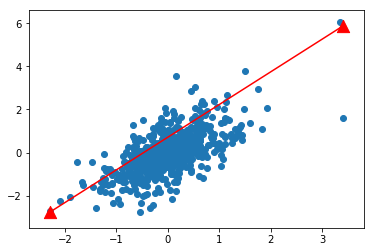

In [30]:
import matplotlib
%matplotlib inline  

fig, ax = plt.subplots()
ax.scatter(stock_hist['OpenCloseDiff'], stock_hist['openDiff'])

x_0 = stock_hist['OpenCloseDiff'].min()
y_0 = stock_hist['openDiff'].min()
x_1 = stock_hist['OpenCloseDiff'].max()
y_1 = 1.0327 * (x_1 - x_0) - 0.0108

# Draw these two points with big triangles to make it clear
# where they lie
ax.scatter([x_0, x_1], [y_0, y_1], marker='^', s=150, c='r')

# And now connect them
ax.plot([x_0, x_1], [y_0, y_1], c='r')    
